In [1]:
import tensorflow as tf
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df=pd.read_csv("fashion-mnist_test.csv")
train_df=pd.read_csv("fashion-mnist_train.csv")

In [3]:
test_df.shape


(10000, 785)

In [15]:
train_df.shape

(60000, 785)

In [16]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
type(train_df)

pandas.core.frame.DataFrame

In [18]:
train=np.array(train_df , dtype='float32')
test=np.array(test_df , dtype='float32')

In [19]:
type(train)
type(test)

numpy.ndarray

In [20]:
xtrain=train[:,1:]/255
ytrain=train[:,0]
xtest=test[:,1:]/255
ytest=test[:,0]

In [21]:
xtrain.shape

(60000, 784)

In [22]:
xtrain=xtrain.reshape(xtrain.shape[0],*(28,28,1))
xtest=xtest.reshape(xtest.shape[0],*(28,28,1))

In [23]:
xtest.shape

(10000, 28, 28, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [25]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)         

In [26]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [27]:
r = model.fit(xtrain,ytrain,batch_size=512,epochs=20,verbose=1)

Epoch 1/20
118/118 [==============================] - 35s 283ms/step - loss: 1.3928 - accuracy: 0.4639
Epoch 2/20
118/118 [==============================] - 35s 295ms/step - loss: 0.8820 - accuracy: 0.6726
Epoch 3/20
118/118 [==============================] - 32s 275ms/step - loss: 0.7777 - accuracy: 0.7118
Epoch 4/20
118/118 [==============================] - 33s 283ms/step - loss: 0.7256 - accuracy: 0.7300
Epoch 5/20
118/118 [==============================] - 34s 287ms/step - loss: 0.6908 - accuracy: 0.7434
Epoch 6/20
118/118 [==============================] - 36s 309ms/step - loss: 0.6671 - accuracy: 0.7528
Epoch 7/20
118/118 [==============================] - 35s 296ms/step - loss: 0.6410 - accuracy: 0.7629
Epoch 8/20
118/118 [==============================] - 34s 289ms/step - loss: 0.6281 - accuracy: 0.7695
Epoch 9/20
118/118 [==============================] - 34s 285ms/step - loss: 0.6104 - accuracy: 0.7765
Epoch 10/20
118/118 [==============================] - 40s 337ms/step - l

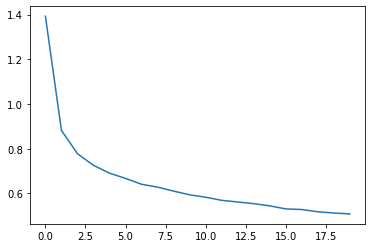

In [28]:
plt.plot(r.history['loss'])

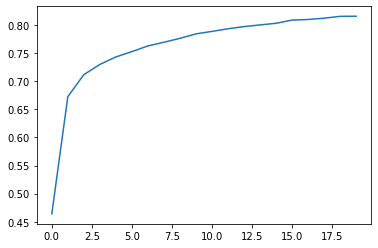

In [29]:
plt.plot(r.history['accuracy'])

In [30]:
xpred=model.predict(xtest)

In [31]:
pred_class=np.argmax(xpred,axis=1)

In [32]:
xpred.shape

(10000, 10)

In [33]:
pred_class[3]

6

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(ytest, pred_class)

array([[810,   0,  35,  44,   4,   0,  97,   0,  10,   0],
       [  1, 959,   4,  22,   2,   1,  11,   0,   0,   0],
       [  9,   0, 793,  17,  89,   1,  88,   0,   3,   0],
       [ 21,   3,  20, 908,  23,   0,  24,   0,   0,   1],
       [  0,   0,  28,  29, 779,   0, 163,   0,   1,   0],
       [  0,   0,   0,   2,   0, 902,   0,  75,   3,  18],
       [149,   1,  95,  30,  98,   0, 621,   0,   6,   0],
       [  0,   0,   0,   0,   0,   3,   0, 940,   0,  57],
       [  2,   0,  15,   2,   6,   9,  13,   3, 949,   1],
       [  0,   0,   0,   0,   0,   1,   0,  69,   0, 930]], dtype=int64)

<AxesSubplot:>

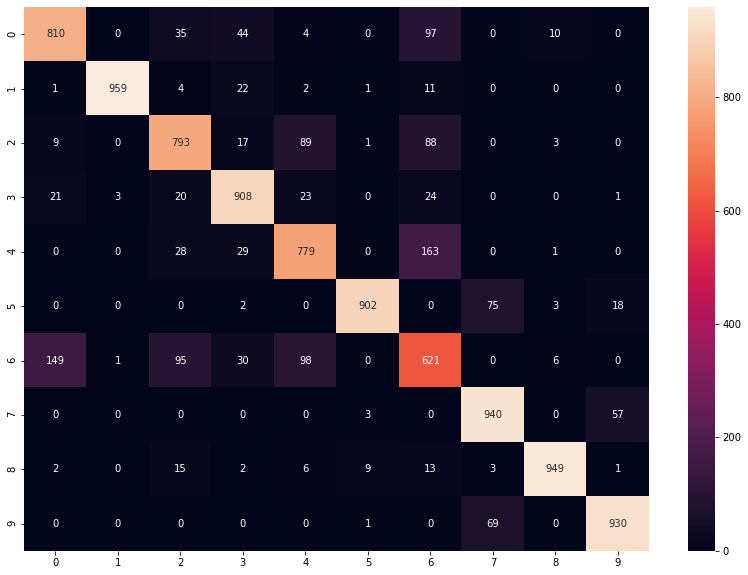

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(ytest, pred_class), annot=True, fmt='d')

In [37]:
print(classification_report(ytest, pred_class))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      1000
         1.0       1.00      0.96      0.98      1000
         2.0       0.80      0.79      0.80      1000
         3.0       0.86      0.91      0.88      1000
         4.0       0.78      0.78      0.78      1000
         5.0       0.98      0.90      0.94      1000
         6.0       0.61      0.62      0.62      1000
         7.0       0.86      0.94      0.90      1000
         8.0       0.98      0.95      0.96      1000
         9.0       0.92      0.93      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

